In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
plt.rc('font',family='Microsoft YaHei')
data = pd.read_excel('data/待复购的用户列表.xlsx')

(1200.0, 1600.0)

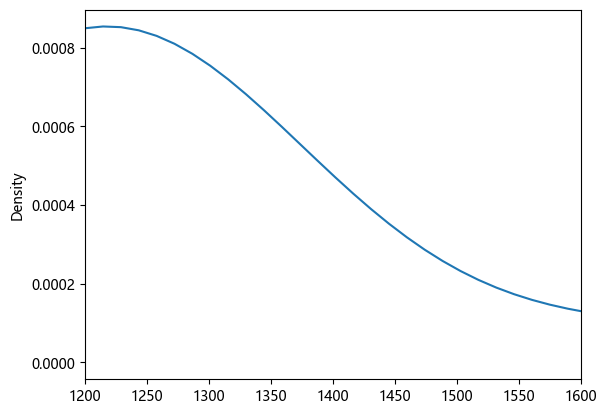

In [3]:
data['是否新下单'] = data['新下单金额'].notna().astype(int)
data_Y = data[(data['新下单金额'].notna()) & (data['新回访次数'].notna()) & (data['最后一次购买奶粉系列'].notna()) & (data['最后一次购买奶粉段位'].notna())]
data_Y['新下单金额'].plot(kind='kde')
plt.xlim(left=1200,right=1600)

In [4]:
data_Y['新下单金额']

37        400.0
83        193.0
131       880.0
288       760.0
303       712.0
          ...  
77183    1650.0
77184     440.0
77214    1320.0
77216       9.9
77223    1320.0
Name: 新下单金额, Length: 3121, dtype: float64

In [5]:
data_Y['新下单数量'].value_counts()

新下单数量
1.0     2643
2.0      370
3.0       69
4.0       20
5.0       11
6.0        5
10.0       1
9.0        1
8.0        1
Name: count, dtype: int64

In [6]:
data_Y['新回访天均次数'] = data_Y['新回访天均次数'].fillna(0)
data_Y['所在群'] = data_Y['所在群'].fillna('无')
data_Y['好友小助手'] = data_Y['好友小助手'].fillna('无')
data_Y

C:\Users\MECHREVO\AppData\Local\Temp\ipykernel_12300\3876839603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Y['新回访天均次数'] = data_Y['新回访天均次数'].fillna(0)
C:\Users\MECHREVO\AppData\Local\Temp\ipykernel_12300\3876839603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Y['所在群'] = data_Y['所在群'].fillna('无')
C:\Users\MECHREVO\AppData\Local\Temp\ipykernel_12300\3876839603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,编号,注册日期,奶粉订单总数,购买奶粉总罐数,最后一次奶粉订单下单日期,最后一次奶粉订单购买罐数,最后一次奶粉预估食用天数,预计应复购日期,最后一次购买奶粉品牌,最后一次购买奶粉系列,...,新下单数量,新下单金额,新下单商品数,新回访天数,新回访次数,新回访天均次数,新回访婴儿奶粉次数,新回访添加购物车数,赠送松多多免费券,是否新下单
37,10334080,2022-04-15 10:30:55.390,3.0,6.0,2022-09-28 15:45:21.710,2.0,14.0,2022-10-18 13:02:58.363,德国 爱他美,德国爱他美白金,...,1.0,400.0,2.0,1.0,1.0,1.0,1.0,0.0,NaN,1
83,10336500,2022-04-16 13:42:00.533,4.0,8.0,2022-07-16 22:41:30.763,2.0,14.0,2022-08-05 10:11:04.437,德国 爱他美,德国爱他美白金,...,1.0,193.0,1.0,2.0,41.0,20.5,30.0,3.0,NaN,1
131,10338600,2022-04-17 13:33:50.367,3.0,8.0,2022-08-02 18:43:21.807,2.0,14.0,2022-08-22 10:11:16.487,德国 爱他美,德国爱他美白金,...,1.0,880.0,4.0,1.0,14.0,14.0,5.0,1.0,NaN,1
288,10344340,2022-04-17 20:48:58.013,7.0,16.0,2022-06-17 16:22:10.857,2.0,14.0,2022-07-07 09:47:12.950,德国 爱他美,德国爱他美白金,...,1.0,760.0,4.0,1.0,10.0,10.0,5.0,0.0,NaN,1
303,10344840,2022-04-17 22:49:52.193,17.0,42.0,2022-10-16 17:48:13.780,4.0,40.0,2022-12-01 10:28:47.273,澳洲 A2,澳洲A2白金,...,1.0,712.0,4.0,1.0,2.0,2.0,1.0,2.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77183,17386360,2023-05-11 13:06:50.333,1.0,1.0,2023-05-11 13:10:43.167,1.0,6.0,2023-05-23 09:16:55.893,爱他美,爱他美奇迹蓝罐,...,1.0,1650.0,6.0,2.0,2.0,1.0,0.0,0.0,NaN,1
77184,17388660,2023-05-11 15:15:57.660,2.0,3.0,2023-05-11 15:41:10.107,1.0,6.0,2023-05-23 10:01:19.460,德国 爱他美,德国爱他美白金,...,1.0,440.0,2.0,2.0,30.0,15.0,22.0,0.0,NaN,1
77214,17402600,2023-05-12 15:08:26.237,1.0,1.0,2023-05-12 15:48:28.450,1.0,6.0,2023-05-24 14:02:01.570,德国 爱他美,德国爱他美白金,...,1.0,1320.0,6.0,1.0,16.0,16.0,7.0,2.0,NaN,1
77216,17404880,2023-05-12 16:56:20.857,1.0,1.0,2023-05-13 21:53:46.560,1.0,6.0,2023-05-25 11:13:39.017,德国 爱他美,德国爱他美白金,...,1.0,9.9,1.0,1.0,13.0,13.0,5.0,0.0,NaN,1


In [7]:
send_time = pd.to_datetime('2023-05-30 00:00:00')
data_Y['注册时间'] = (send_time - data_Y['注册日期']).dt.days
data_Y['最后一次下单后累计时间'] =  (send_time - data_Y['最后一次奶粉订单下单日期']).dt.days
data_Y['预计复购累计时间'] = (send_time - data_Y['预计应复购日期']).dt.days

C:\Users\MECHREVO\AppData\Local\Temp\ipykernel_12300\4261727264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Y['注册时间'] = (send_time - data_Y['注册日期']).dt.days
C:\Users\MECHREVO\AppData\Local\Temp\ipykernel_12300\4261727264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Y['最后一次下单后累计时间'] =  (send_time - data_Y['最后一次奶粉订单下单日期']).dt.days
C:\Users\MECHREVO\AppData\Local\Temp\ipykernel_12300\4261727264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [13]:
numeric_df = data_Y.select_dtypes(include=['number'])
numeric_df.corr()['新下单金额'].sort_values(ascending=False)

新下单金额           1.000000
新下单商品数          0.926412
新下单数量           0.529626
最后一次奶粉订单购买罐数    0.216530
最后一次奶粉预估食用天数    0.176388
新回访婴儿奶粉次数       0.154158
购买奶粉总罐数         0.134975
新回访添加购物车数       0.075955
新回访次数           0.058224
新回访天数           0.054437
新回访天均次数         0.051690
关注公众号           0.016330
编号              0.014063
奶粉订单总数          0.000859
最后一次下单后累计时间    -0.009262
注册时间           -0.019107
预计复购累计时间       -0.041306
赠送松多多免费券             NaN
是否新下单                NaN
Name: 新下单金额, dtype: float64

In [27]:
data_Y['购买奶粉总罐数'].value_counts()

购买奶粉总罐数
1.0      294
2.0      267
6.0      249
4.0      197
8.0      171
        ... 
104.0      1
72.0       1
74.0       1
98.0       1
68.0       1
Name: count, Length: 74, dtype: int64

# 类别变量

Text(0.5, 0, '新下单金额')

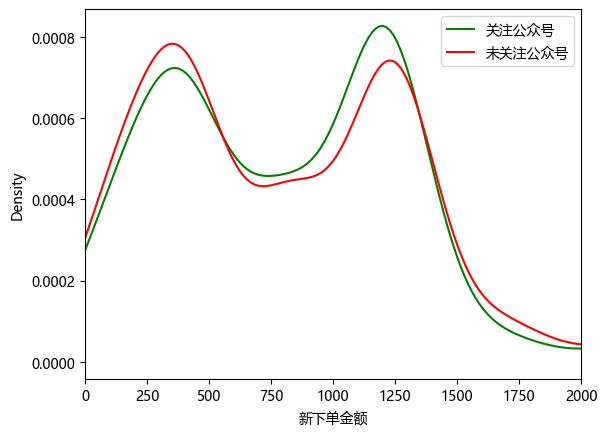

In [24]:
g1 = pd.Series(data_Y[data_Y['关注公众号'] == 1]['新下单金额'], name='关注公众号')
g2 = pd.Series(data_Y[data_Y['关注公众号'] == 0]['新下单金额'], name='未关注公众号')
g1.plot(kind='kde',color='green')
g2.plot(kind='kde',color = 'red')
plt.xlim(0,2000)
plt.legend()
plt.xlabel('新下单金额')

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('新下单金额 ~ C(最后一次购买奶粉品牌)', data=data_Y).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                     sum_sq      df         F        PR(>F)
C(最后一次购买奶粉品牌)  4.107287e+07    27.0  3.318217  1.717696e-08
Residual       1.417968e+09  3093.0       NaN           NaN


In [80]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result = pairwise_tukeyhsd(endog=data_Y['新下单金额'], groups=data_Y['最后一次购买奶粉品牌'], alpha=0.05)
print(tukey_result)
significant_results = tukey_result.summary()
significant_df = pd.DataFrame(significant_results.data[1:],columns=significant_results.data[0])
significant_df[significant_df['reject'] == True]

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff  p-adj    lower      upper   reject
---------------------------------------------------------------
    a2至初    丹麦 阿拉     -153.0    1.0 -3713.1784 3407.1784  False
    a2至初       伊利     -168.0    1.0 -3728.1784 3392.1784  False
    a2至初    德国 喜宝   -25.0833    1.0 -2744.2145 2694.0479  False
    a2至初   德国 爱他美   539.6422    1.0  -1978.345 3057.6294  False
    a2至初    德国 雀巢   181.5015    1.0 -2354.3678 2717.3707  False
    a2至初    波兰 牛栏     -338.3    1.0 -3898.4784 3221.8784  False
    a2至初   港版 美赞臣     -333.0    1.0 -3893.1784 3227.1784  False
    a2至初    港版 雀巢   297.3267    1.0 -2609.5468 3204.2002  False
    a2至初    澳洲 A2   364.3025    1.0 -2168.8089 2897.4139  False
    a2至初   澳洲 可瑞康     -142.0    1.0  -3225.205  2941.205  False
    a2至初   澳洲 爱他美   536.5153    1.0 -1983.4372 3056.4679  False
    a2至初   澳洲 纽康特      -26.0    1.0  -3109.205  3057.205  False
    a2至初    澳洲 贝儿       20.0    1.0 -354

,group1,group2,meandiff,p-adj,lower,upper,reject
102,德国 爱他美,德国 雀巢,-358.1407,0.0055,-668.0145,-48.2670,True
121,德国 爱他美,荷兰 牛栏,-312.3818,0.0196,-604.1497,-20.6139,True
130,德国 雀巢,澳洲 爱他美,355.0139,0.0147,29.5552,680.4725,True
138,德国 雀巢,爱他美,577.2331,0.0027,96.6419,1057.8243,True
254,澳洲 爱他美,荷兰 牛栏,-309.2550,0.0480,-617.5245,-0.9854,True
343,爱他美,英国 爱他美,-549.3297,0.0408,-1090.0162,-8.6432,True
346,爱他美,荷兰 牛栏,-531.4742,0.0079,-1000.5954,-62.3530,True


Text(0.5, 0, '新下单金额')

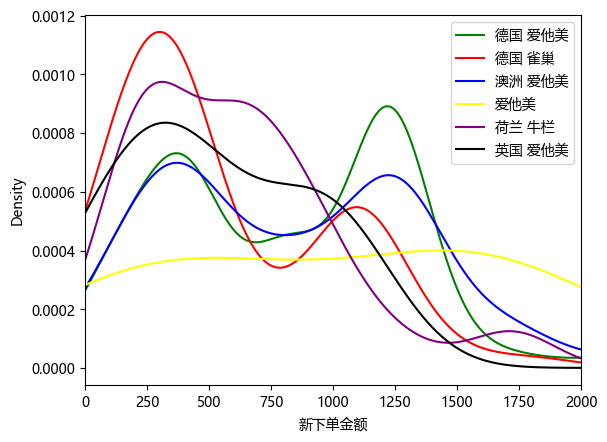

In [81]:
g1 = pd.Series(data_Y[data_Y['最后一次购买奶粉品牌'] == '德国 爱他美']['新下单金额'], name='德国 爱他美')
g2 = pd.Series(data_Y[data_Y['最后一次购买奶粉品牌'] == '德国 雀巢']['新下单金额'], name='德国 雀巢')
g3 = pd.Series(data_Y[data_Y['最后一次购买奶粉品牌'] == '澳洲 爱他美']['新下单金额'], name='澳洲 爱他美')
g4 = pd.Series(data_Y[data_Y['最后一次购买奶粉品牌'] == '爱他美']['新下单金额'], name='爱他美')
g5 = pd.Series(data_Y[data_Y['最后一次购买奶粉品牌'] == '荷兰 牛栏']['新下单金额'], name='荷兰 牛栏')
g6 = pd.Series(data_Y[data_Y['最后一次购买奶粉品牌'] == '英国 爱他美']['新下单金额'], name='英国 爱他美')

g1.plot(kind='kde',color='green')
g2.plot(kind='kde',color = 'red')
g3.plot(kind='kde',color='blue')
g4.plot(kind='kde',color='yellow')
g5.plot(kind='kde',color='purple')
g6.plot(kind='kde',color='black')

plt.xlim(0,2000)
plt.legend()
plt.xlabel('新下单金额')